In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [6]:
iris = load_iris()

In [18]:
X = iris.data
y = iris.target

<Axes: >

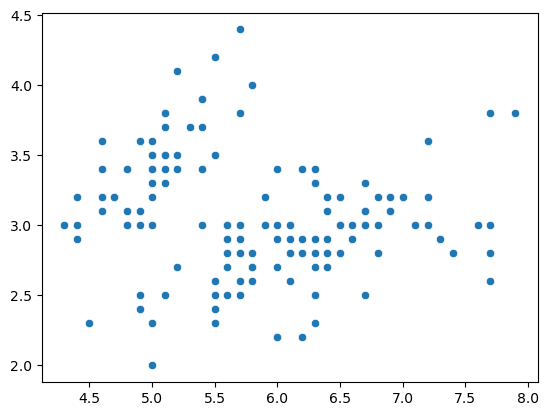

In [13]:
# Visualize 
sns.scatterplot(x=X[:,0] , y=X[:,1])

In [19]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Dimentionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

In [27]:
# Elbow method 
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)

<Axes: >

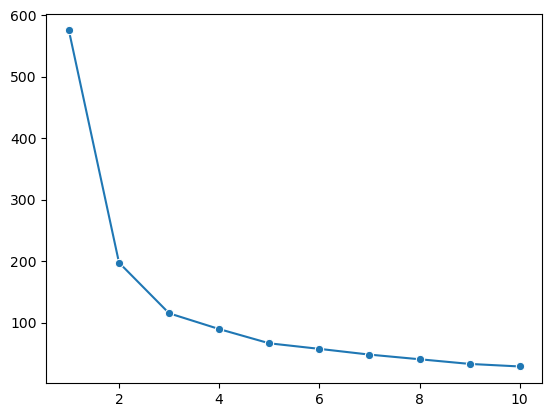

In [28]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

<Axes: >

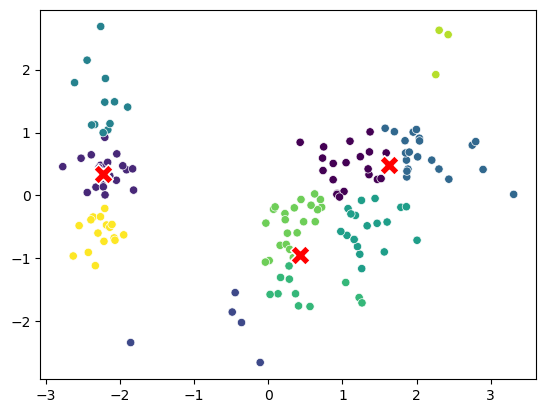

In [31]:
# KMeans

kmeans = KMeans(n_clusters=3,random_state=10)
label = kmeans.fit_predict(pca_data)

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:,1], c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200)